<a href="https://colab.research.google.com/github/palVikram/Machine-Learning-using-Python/blob/master/upper_bound_confidence_ads_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ls

Ads_CTR_Optimisation.csv  sample_data/


In [2]:
import pandas as pd
df=pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [8]:
### Implementing UBC
import math
N=10000
d=10
ads_selected=[]
number_of_selection=[0]*d
sum_of_rewards=[0]*d
total_reward=0

for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if number_of_selection[i]>0:
      average_reward=sum_of_rewards[i]/number_of_selection[i]
      delta_i=math.sqrt(3/2 * math.log(n+1)/number_of_selection[i])
      upper_bound=average_reward+delta_i
    else: 
      upper_bound=1e400

    if upper_bound>max_upper_bound:
      max_upper_bound=upper_bound
      ad=i
    ads_selected.append(ad)
    number_of_selection[ad] +=1
    reward=+df.values[n,ad]
    sum_of_rewards[ad]=sum_of_rewards[ad]+reward
    total_reward=total_reward+reward

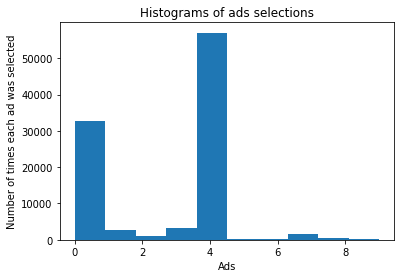

In [11]:
import matplotlib.pyplot as plt
plt.hist(ads_selected)
plt.title("Histograms of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()